In [1]:
# 이진 분류를 확율로 계산함

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 데이터 로딩

In [152]:
fish = pd.read_csv('fish.csv')
fish.head()
print(type(fish))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# 확율로 분류할 수 도 있음
# 확율로 분류하는 것이 로지스틱 회귀

In [112]:
fish['Species'].unique()  # 같은
pd.unique(fish['Species'])# 같은

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### 데이터 numpy로 함

In [26]:
# 데이터 분리
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [125]:
# 확인
print(fish_input[:5])
print(fish_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


### 훈련세트와 테스트세트로 분리

In [29]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state = 42)

### 피처 스케링 (표준화)

In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) 
# test_input는 fit() 할 필요없다. 
# fit() train_input만 훈련 시키면되 이유: transform에서 실제로 반영됨


train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### K-최근접 이웃 분류기를 이용한 확률 예측

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_scaled, train_target)

print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [43]:
knn.classes_
# 알팟배 순서로 정렬 되어 있음

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [46]:
knn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [50]:
# predict_proba() : 클래스별 확률값을 반환해주는 매서드
proba = knn.predict_proba(test_scaled[:5])

# decimals : 유지할 소수점 자릿수
np.round(proba, decimals= 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

- 1. 이렇게 분류하는 맞을까? 의심하고 재확인
- 2. 이웃으로 분석

In [52]:
d, indexs = knn.kneighbors(test_scaled[3:4])

train_target[indexs]

array([['Roach', 'Perch', 'Perch']], dtype=object)

- 예측할 수 있지만 올바른 확률이라고 하기 어렵다
- 이웃 값 늘리면 일반화 떨어진다
- 그래서 로지스틱 회귀 사용

# 로지스틱 회귀
- 대표적인 분류 알고리즘
- 인공신경망에 기본이 되는 알고리즘
- 선형회귀와 비슷하게 선형 방정식을 학습하는 알고리즘이다.

### 로지스틱 회귀(이진 분류)

In [62]:
arr = np.array(['A','B','C','D','E'])

# boolean indexing
boole = [True, False, True, False, False]
arr[boole]

array(['A', 'C'], dtype='<U1')

In [65]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [70]:
print(train_input.shape, train_target.shape)

(119, 5) (119,)


In [72]:
print(test_input.shape, test_target.shape)

(40, 5) (40,)


In [77]:
# Bream, Smelt이 데이터만 이용한 이진분류 학습

indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train = train_scaled[indexes]
target= train_target[indexes]

### 로지스틱

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train, target)

LogisticRegression()

In [108]:
lr.predict(train[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [89]:
# 예측 확률
lr.predict_proba(train[:5])
#       음성(Bream)  양성(Smelt)

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [91]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [97]:
# z값 계산
decisions = lr.decision_function(train[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [130]:
# 마이너스 나오면 완되고 시그모이드를 통해서 고침
# 시가모이드 함수를 통해 확률값 추출
from scipy.special import expit

# 양성일 확률(smelt일 확률)
print(expit(decisions))

# 음성일 확률(bream일 확률)
print(1 - expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
[0.99759855 0.02735183 0.99486072 0.98584202 0.99767269]


In [113]:
print('회귀계수 : {}'.format(lr.coef_), 
      '\n절편 : {}'.format(lr.intercept_),
      '\n회귀방정식 : {:.3f} x Weight + {:.3f} x Length + {:.3f} x Diagonal + {:.3f} x Height + {:.3f} x Width + {:.3f}'.format(
          lr.coef_[0, 0], lr.coef_[0, 1], lr.coef_[0, 2], lr.coef_[0, 3], lr.coef_[0, 4], lr.intercept_[0]))

회귀계수 : [[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] 
절편 : [-2.16155132] 
회귀방정식 : -0.404 x Weight + -0.576 x Length + -0.663 x Diagonal + -1.013 x Height + -0.732 x Width + -2.162


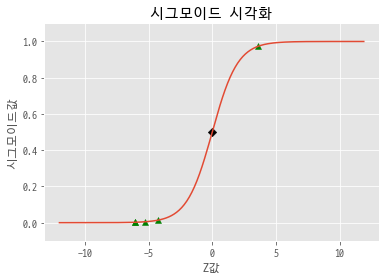

In [124]:
## ggplot 스타일
mpl.style.use('ggplot')
# matplotlib 한글화
mpl.rcParams['font.family'] = 'D2coding'

# 시그모이드 함수 시각화
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x_data = np.arange(-12, 12, 0.1)
result = sigmoid(x_data)

plt.plot(x_data, result)
plt.scatter(0, 0.5, marker = 'D', color = 'black')
plt.scatter(decisions, expit(decisions),marker='^' ,color = 'g')

plt.title('시그모이드 시각화')
plt.xlabel('Z값')
plt.ylabel('시그모이드값')
plt.ylim(-0.1, 1.1)
plt.show()

## 로지스틱(다중 분류)

In [138]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000) # 규제
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [139]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [143]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [149]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [151]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
# 소프트맥스, 다중 시그모시
decisions = 